In [1]:
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import ccf_streamlines.projection as ccfproj
from datasets import load_from_disk
import yaml


/grid/zador/home/benjami/miniconda3/envs/geneformer2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
predictions_path = "/grid/zador/home/benjami/brain-annotation/outputs/2024-11-04/16-15-17/test_brain_predictions.npy" # 64 cells
ccf_files_path = "/grid/zador/data_norepl/Ari/transcriptomics/CCF_files"

predictions_path = "/grid/zador/home/benjami/brain-annotation/outputs/single_cell_preds_32/validation_brain_predictions.npy" # 128 cells

In [61]:
pred_dict = np.load(predictions_path, allow_pickle=True).item()

In [62]:
[len(pred_dict['locations']), len(pred_dict['predictions'])], pred_dict.keys()

([3510, 3510],
 dict_keys(['locations', 'labels', 'predictions', 'indices', 'label_names']))

In [63]:
acc = (np.array(pred_dict['labels']) == np.array(pred_dict["predictions"])).sum() / len(pred_dict['labels'])
print("Accuracy", acc)

Accuracy 0.7333333333333333


In [64]:
bf_boundary_finder = ccfproj.BoundaryFinder(
    projected_atlas_file=    os.path.join(ccf_files_path,"flatmap_butterfly.nrrd"),
    labels_file=    os.path.join(ccf_files_path,"labelDescription_ITKSNAPColor.txt"),
)

bf_left_boundaries_flat = bf_boundary_finder.region_boundaries()
bf_right_boundaries_flat = bf_boundary_finder.region_boundaries(
    hemisphere='right_for_both',
    view_space_for_other_hemisphere='flatmap_butterfly',
)

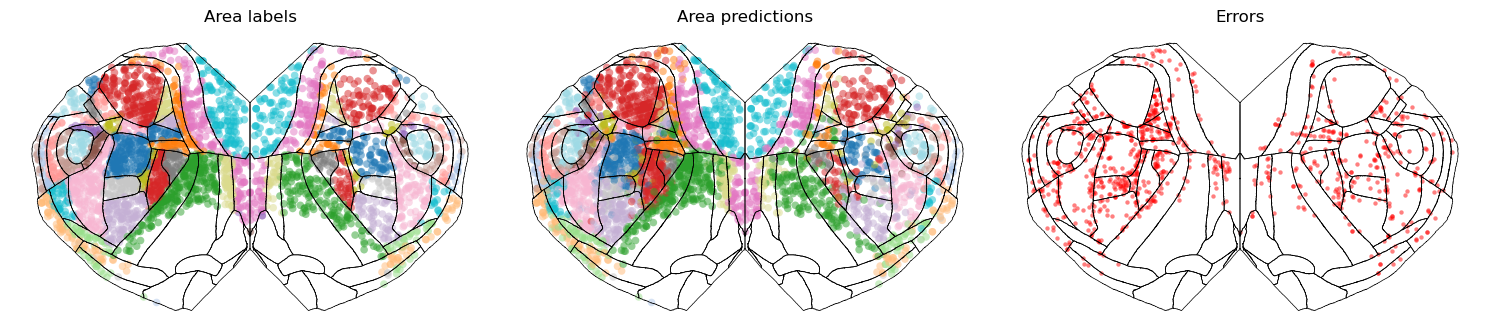

In [65]:
n=1000000
every = 1

categories = np.unique(pred_dict['labels'])
cs = np.random.permutation(np.array(sns.color_palette("tab20", len(categories))))

f, ax = plt.subplots(1, 3, figsize=(15, 5))

### Panel 1
color_idx = [categories.tolist().index(j) for j in pred_dict['labels'][:n:every]]
ax[0].scatter(np.array(pred_dict['locations'])[:n:every,0], np.array(pred_dict['locations'])[:n:every,1], color=cs[color_idx], 
            alpha=.5, linewidths=0, s=30)
ax[0].set_title("Area labels")

### Panel 2
color_idx = [categories.tolist().index(j) for j in pred_dict['predictions'][:n:every]]
ax[1].scatter(np.array(pred_dict['locations'])[:n:every,0], np.array(pred_dict['locations'])[:n:every,1], color=cs[color_idx], 
            alpha=.5, linewidths=0, s=30)
ax[1].set_title("Area predictions")

### Panel 3
misclassified = np.array(pred_dict['labels']) != np.array(pred_dict["predictions"])
x = np.array(pred_dict['locations'])[misclassified][:n:every,0]
y = np.array(pred_dict['locations'])[misclassified][:n:every,1]

ax[2].scatter(x,y, color='r',  alpha=.5, linewidths=0, s=10)
ax[2].set_title("Errors")

for a in ax:
    a.grid(False)
    for k, boundary_coords in bf_left_boundaries_flat.items():
        a.plot(*boundary_coords.T, c="k", lw=0.5)
    for k, boundary_coords in bf_right_boundaries_flat.items():
        a.plot(*boundary_coords.T, c="k", lw=0.5)

    a.axis('off')
    a.set_aspect('equal')
plt.tight_layout()
plt.savefig('single_cell_preds_32_val.png', dpi=300)
plt.show()


## Class weights model

Accuracy 72.84900284900286


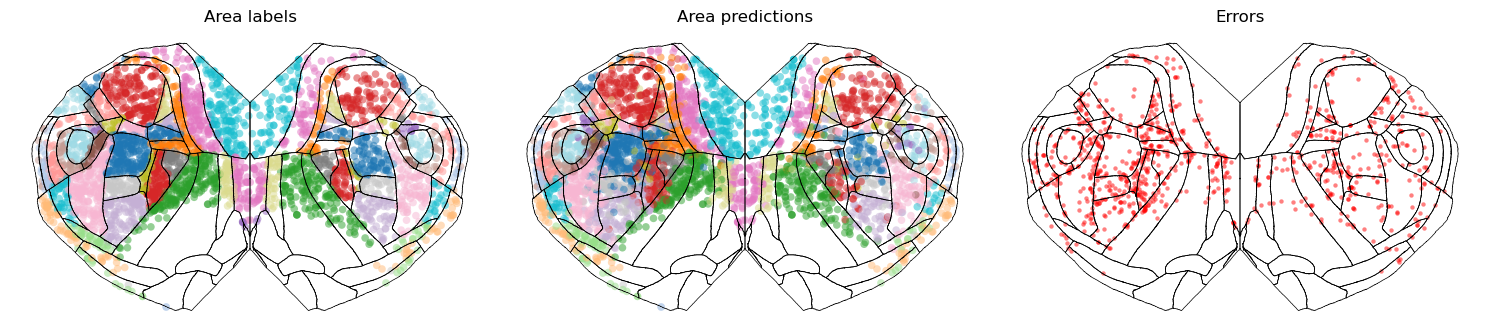

In [66]:

predictions_path = "/grid/zador/home/benjami/brain-annotation/outputs/class_weights_32/validation_brain_predictions.npy"
pred_dict = np.load(predictions_path, allow_pickle=True).item()

acc = (np.array(pred_dict['labels']) == np.array(pred_dict["predictions"])).sum() / len(pred_dict['labels'])
print("Accuracy", 100*acc)

n=1000000
every = 1
f, ax = plt.subplots(1, 3, figsize=(15, 5))

### Panel 1
color_idx = [categories.tolist().index(j) for j in pred_dict['labels'][:n:every]]
ax[0].scatter(np.array(pred_dict['locations'])[:n:every,0], np.array(pred_dict['locations'])[:n:every,1], color=cs[color_idx], 
            alpha=.5, linewidths=0, s=30)
ax[0].set_title("Area labels")

### Panel 2
color_idx = [categories.tolist().index(j) for j in pred_dict['predictions'][:n:every]]
ax[1].scatter(np.array(pred_dict['locations'])[:n:every,0], np.array(pred_dict['locations'])[:n:every,1], color=cs[color_idx], 
            alpha=.5, linewidths=0, s=30)
ax[1].set_title("Area predictions")

### Panel 3
misclassified = np.array(pred_dict['labels']) != np.array(pred_dict["predictions"])
x = np.array(pred_dict['locations'])[misclassified][:n:every,0]
y = np.array(pred_dict['locations'])[misclassified][:n:every,1]

ax[2].scatter(x,y, color='r',  alpha=.5, linewidths=0, s=10)
ax[2].set_title("Errors")

for a in ax:
    a.grid(False)
    for k, boundary_coords in bf_left_boundaries_flat.items():
        a.plot(*boundary_coords.T, c="k", lw=0.5)
    for k, boundary_coords in bf_right_boundaries_flat.items():
        a.plot(*boundary_coords.T, c="k", lw=0.5)

    a.axis('off')
    a.set_aspect('equal')
plt.tight_layout()
plt.savefig('class_weights_32_val.png', dpi=300)
plt.show()




## Single cells

In [67]:
# /grid/zador/home/benjami/brain-annotation/outputs/2024-11-18/15-22-43
predictions_path = "/grid/zador/home/benjami/brain-annotation/outputs/class_weights_ss_256/validation_brain_predictions.npy" # 256 cells
pred_dict = np.load(predictions_path, allow_pickle=True).item()

dataset = load_from_disk("/grid/zador/data_norepl/Ari/transcriptomics/barseq/Chen2023/train_test_barseq.dataset")




Accuracy 75.10612871004567


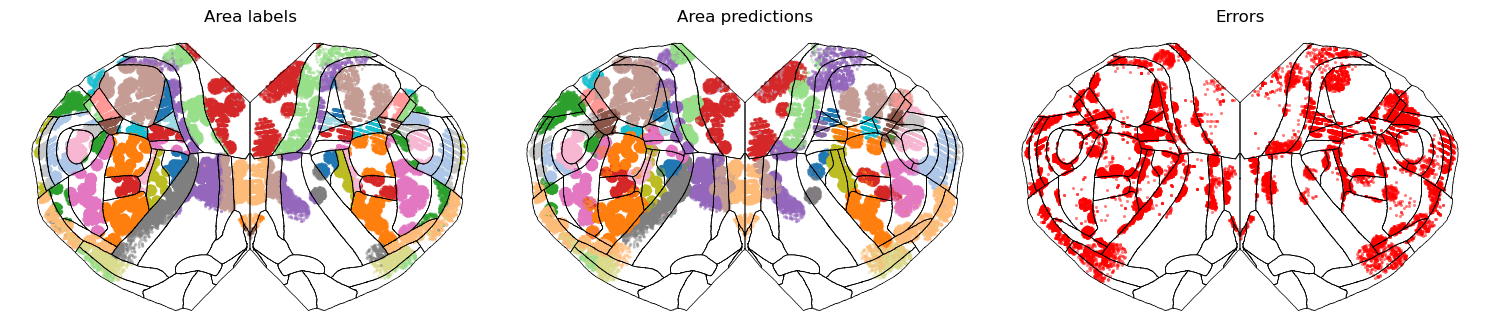

In [77]:
every = 1

labels = np.array(pred_dict['single_cell_labels']).flatten()[::every]
preds = np.array(pred_dict['single_cell_predictions']).flatten()[::every]
indices = np.array(pred_dict['indices']).flatten()[::every]

xyz = np.array(dataset['train'][indices]['CCF_streamlines'])
x = xyz[:,0]
y = xyz[:,1]

acc = (preds == labels).sum() / len(labels)
print("Accuracy", 100*acc)

categories = list(set(np.unique(preds)) | set(np.unique(labels)))
cs = np.random.permutation(np.array(sns.color_palette("tab20", len(categories))))

f, ax = plt.subplots(1, 3, figsize=(15, 5))

### Panel 1
color_idx = [categories.index(j) for j in labels]
ax[0].scatter(x,y, color=cs[color_idx], 
            alpha=.5, linewidths=0, s=5)
ax[0].set_title("Area labels")

### Panel 2
color_idx = [categories.index(j) for j in preds]
ax[1].scatter(x,y, color=cs[color_idx], 
            alpha=.5, linewidths=0, s=5)
ax[1].set_title("Area predictions")

### Panel 3
misclassified = labels != preds
ax[2].scatter(x[misclassified],y[misclassified], color='r',  alpha=.5, linewidths=0, s=5)
ax[2].set_title("Errors")

for a in ax:
    a.grid(False)
    for k, boundary_coords in bf_left_boundaries_flat.items():
        a.plot(*boundary_coords.T, c="k", lw=0.5)
    for k, boundary_coords in bf_right_boundaries_flat.items():
        a.plot(*boundary_coords.T, c="k", lw=0.5)

    a.axis('off')
    a.set_aspect('equal')
plt.tight_layout()
plt.savefig('cellular_class_weights_256_val.png', dpi=300)
plt.show()
